In [1]:
# Import and display the file
import pandas as pd
customers_file = pd.read_csv('mallcustomers.csv')
customers_file

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,"15,000 USD",39
1,2,Male,21,"15,000 USD",81
2,3,Female,20,"16,000 USD",6
3,4,Female,23,"16,000 USD",77
4,5,Female,31,"17,000 USD",40
...,...,...,...,...,...
195,196,Female,35,"120,000 USD",79
196,197,Female,45,"126,000 USD",28
197,198,Male,32,"126,000 USD",74
198,199,Male,32,"137,000 USD",18


In [2]:
# Problem 1
# Remove special characters from values so they can be processed as integers
customers_file['Income'] = customers_file['Income'].str.replace(' USD', '', regex=False)
customers_file['Income'] = customers_file['Income'].str.replace(',', '', regex=False).astype('int')
customers_file

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


In [3]:
# Problem 2
# Drop CustomerId from db as we will not be using it
customers_file.drop(columns='CustomerID', inplace=True)
customers_file

,Gender,Age,Income,SpendingScore
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40
...,...,...,...,...
195,Female,35,120000,79
196,Female,45,126000,28
197,Male,32,126000,74
198,Male,32,137000,18


In [4]:
# Problem 3 
# Summary of Income and Spending Score
summary = customers_file[["Income","SpendingScore"]].describe()
summary

,Income,SpendingScore
count,200.000000,200.000000
mean,60560.000000,50.200000
std,26264.721165,25.823522
min,15000.000000,1.000000
25%,41500.000000,34.750000
50%,61500.000000,50.000000
75%,78000.000000,73.000000
max,137000.000000,99.000000


In [5]:
# Problem 4
# Normalize SpendingScore using z-score normalization
mean_value = customers_file['SpendingScore'].mean()
std_value  = customers_file['SpendingScore'].std()
customers_file['SpendingScore'] = (customers_file['SpendingScore'] - mean_value) / std_value
customers_file['Income']        = (customers_file['Income']        - mean_value) / std_value
customers_file

,Gender,Age,Income,SpendingScore
0,Male,19,578.921814,-0.433713
1,Male,21,578.921814,1.192711
2,Female,20,617.646199,-1.711618
3,Female,23,617.646199,1.037814
4,Female,31,656.370584,-0.394989
...,...,...,...,...
195,Female,35,4644.982258,1.115262
196,Female,45,4877.328570,-0.859681
197,Male,32,4877.328570,0.921640
198,Male,32,5303.296807,-1.246925


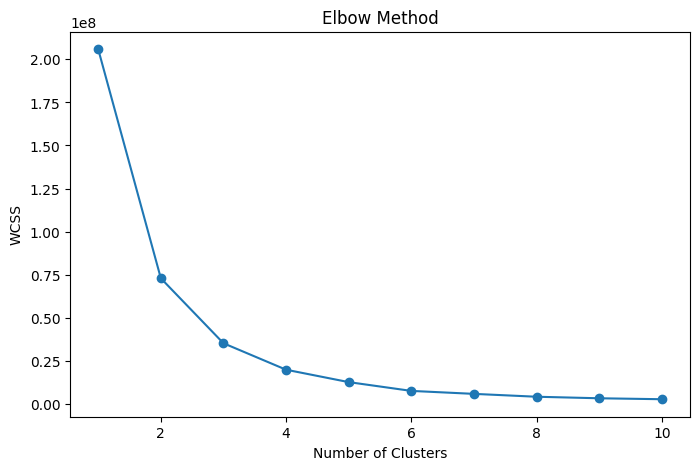

In [6]:
#Plot the elbow method to find the best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

# Variables for loop
wcss    = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customers_file[['Income','SpendingScore']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.savefig("ElbowMethod")
plt.show()

In [7]:
# Using Knee Locator to determine the sharpest change, etc our elbow
from kneed import KneeLocator
kl = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = kl.knee
print("Optimal Knee : ", optimal_k)

Optimal Knee :  3


In [8]:
# Set the number of cluseters based off of the Knee Locator and Display labels and Cluster Center
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
labels = kmeans.fit_predict(customers_file[['Income','SpendingScore']])
print(f"Labels : {labels}\n\nCluster Centers : {kmeans.cluster_centers_}")

Labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Cluster Centers : [[ 1.29479964e+03  1.15126551e-03]
 [ 2.59603201e+03 -7.74487704e-03]
 [ 3.86619185e+03  1.69957024e-02]]


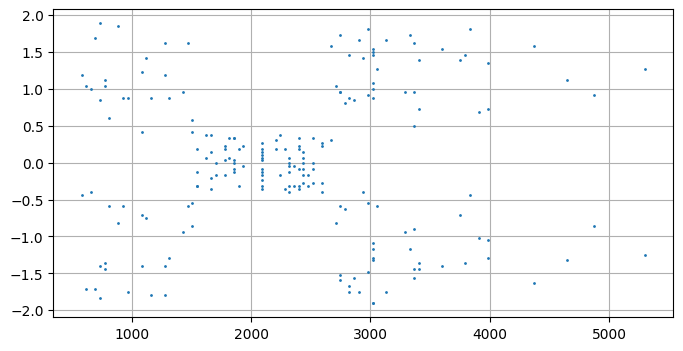

In [9]:
# Plotting clusters
plt.figure(figsize=(8, 4))
plt.scatter(customers_file[['Income','SpendingScore']].iloc[:, 0], customers_file[['Income','SpendingScore']].iloc[:, 1], c=None, s=1)
plt.gca().set_axisbelow(True)
plt.grid()
plt.savefig("ScatterPlot")
plt.show()

In [10]:
# Problem 5
# Use Gender and Age to gather addidional information about the data
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

customers_file['Clusters'] = labels
customers_file_cluster_0 = customers_file[customers_file['Clusters'] == 0]
customers_file_cluster_1 = customers_file[customers_file['Clusters'] == 1]
customers_file_cluster_2 = customers_file[customers_file['Clusters'] == 2]

# Gathering mean age of person in each cluster
cluster0_mean     = customers_file_cluster_0['Age'].mean()
cluster1_mean     = customers_file_cluster_1['Age'].mean()
cluster2_mean     = customers_file_cluster_2['Age'].mean()

# Gathering mean income per cluster
cluster0_income   = customers_file_cluster_0['Income'].mean().round(2)
cluster1_income   = customers_file_cluster_1['Income'].mean().round(2)
cluster2_income   = customers_file_cluster_2['Income'].mean().round(2)

# Gathering mean Spending Score per cluster
cluster0_spending = customers_file_cluster_0['SpendingScore'].mean()
cluster1_spending = customers_file_cluster_1['SpendingScore'].mean()
cluster2_spending = customers_file_cluster_2['SpendingScore'].mean()

# Determine number of each gender in each cluster
maleCount0   = 0
femaleCount0 = 0
maleCount1   = 0
femaleCount1 = 0
maleCount2   = 0
femaleCount2 = 0

# Loop through cluster zero
for i in range(0,customers_file_cluster_0.count()[0]):
    if customers_file_cluster_0['Gender'][i] == 'Male':
        maleCount0 += 1
    else:
        femaleCount0 += 1

# Set starting value to the end of cluster zero
# Loop through cluster one
startVal = customers_file_cluster_0.count()[0] + 1
for k in range(startVal, startVal + customers_file_cluster_1.count()[0] - 1):
    if customers_file_cluster_1['Gender'][k] == 'Male':
        maleCount1 += 1
    else:
        femaleCount1 += 1

# Set starting value to the end of cluster one
# Loop through cluster two
startVal += customers_file_cluster_1.count()[0]
for m in range(startVal, startVal + customers_file_cluster_2.count()[0] - 1):
    if customers_file_cluster_2['Gender'][m] == 'Male':
        maleCount2 += 1
    else:
        femaleCount2 += 1

# Save results to a dataframe
final_summary = pd.DataFrame({'Cluster' : [0, 1, 2],
                              'Mean Age' : [cluster0_mean, cluster1_mean, cluster2_mean],
                              'Males' : [maleCount0, maleCount1, maleCount2],
                              'Females' : [femaleCount0, femaleCount1, femaleCount2],
                              'Income' : [cluster0_income, cluster1_income, cluster2_income],
                              'Spending Score ' : [cluster0_spending, cluster1_spending, cluster2_spending]})
final_summary

,Cluster,Mean Age,Males,Females,Income,Spending Score
0,0,39.500000,29,45,1294.80,0.001151
1,1,38.722222,40,49,2596.03,-0.007745
2,2,37.833333,17,18,3866.19,0.016996
